## Carga de los datos

El conjunto de datos de ChestX-ray8 se puede encontrar en https://nihcc.app.box.com/v/ChestXray-NIHCC/, una opción es descargar la carpeta con las imágenes en un .zip pero NIH ya proporciona .py capaz de descargar y descomprimir los archivos de las imágenes. Ese archivo ha sido modificado para descargar las imágenes en una carpeta más conveniente con la estructura del proyecto.

In [1]:
# Comprobamos si tenemos las imágenes y si no se tienen, se procede a la descarga
import os
import sys
images_dir = '../data/images/'

# !python ../src/batch_download_zips_modifed.py

In [2]:
# Descomprimir .tar.gz
# !python ../src/unzip_images.py

Descomprimiendo ../data/images/images_01.tar.gz...
images_01.tar.gz descomprimido en ../data/extracted_images/
Descomprimiendo ../data/images/images_02.tar.gz...
images_02.tar.gz descomprimido en ../data/extracted_images/
Descomprimiendo ../data/images/images_03.tar.gz...
images_03.tar.gz descomprimido en ../data/extracted_images/
Descomprimiendo ../data/images/images_04.tar.gz...
images_04.tar.gz descomprimido en ../data/extracted_images/
Descomprimiendo ../data/images/images_05.tar.gz...
images_05.tar.gz descomprimido en ../data/extracted_images/
Descomprimiendo ../data/images/images_06.tar.gz...
images_06.tar.gz descomprimido en ../data/extracted_images/
Descomprimiendo ../data/images/images_07.tar.gz...
images_07.tar.gz descomprimido en ../data/extracted_images/
Descomprimiendo ../data/images/images_08.tar.gz...
images_08.tar.gz descomprimido en ../data/extracted_images/
Descomprimiendo ../data/images/images_09.tar.gz...
images_09.tar.gz descomprimido en ../data/extracted_images/
D

C:\Users\MEDHYCON\Documents\Marta\TFM\JULE\src\unzip_images.py:22: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(output_dir)  # Extraer todo en la carpeta de salida


In [3]:
data_dir = '../data/extracted_images/images/'
# Ver cuántas imágenes se han descomprimido
image_files = [f for f in os.listdir(data_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Número total de imágenes descomprimidas: {len(image_files)}")


Número total de imágenes descomprimidas: 112120


In [5]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(224, 224)):
    # Cargar la imagen en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Redimensionar la imagen
    img_resized = cv2.resize(img, target_size)
    
    # Normalizar los valores de la imagen
    img_normalized = img_resized / 255.0
    
    return img_normalized

# Ejemplo de cómo preprocesar las imágenes descomprimidas
preprocessed_images = []
for img_file in image_files[:5]:  # Procesar solo las primeras 5 como ejemplo
    img_path = os.path.join(data_dir, img_file)
    preprocessed_img = preprocess_image(img_path)
    preprocessed_images.append(preprocessed_img)

print(f"Ejemplo de imágenes preprocesadas: {np.array(preprocessed_images).shape}")


Ejemplo de imágenes preprocesadas: (5, 224, 224)


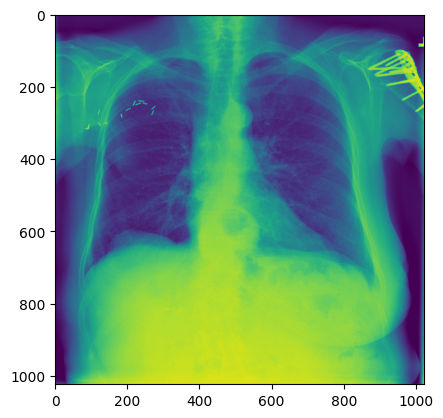

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from torchvision import transforms
from PIL import Image

# Definir las transformaciones
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Cambiar el tamaño de la imagen a 224x224
    transforms.RandomHorizontalFlip(),  # Aumento de datos
    transforms.ToTensor(),  # Convertir la imagen a tensores
    transforms.Normalize([0.485], [0.229])  # Normalización de la imagen (media y std del conjunto de datos)
])

# Ejemplo de cómo cargar y aplicar transformaciones a una imagen
image_path = "ruta_a_la_imagen.png"
image = Image.open(image_path).convert('L')  # Convertir la imagen a escala de grises
image = data_transforms(image)  # Aplicar las transformaciones
